# Pandas 4: Working with date- and time-based data

<center><img src="https://github.com/pandas-dev/pandas/raw/main/web/pandas/static/img/pandas.svg" alt="pandas Logo" style="width: 800px;"/></center>


---

## Overview 

In this notebook, we'll work with Pandas `DataFrame` and `Series` objects  to do the following:
1. Work with  Pandas' implementation of methods and attributes from Python's `datetime` library
1. Relabel a Series from a column whose values are date and time strings
1. Employ a `lambda` function to convert date/time strings to `datetime` objects
1. Use Pandas' built-in `plot` function to generate a basic time series plot
1. Improve the look of the time series plot by using Matplotlib

We'll once again use NYS Mesonet data, but for the entire day of 2 September 2021.

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| Matplotlib  | Necessary | |
| Datetime | Helpful | |
| Pandas  | Necessary | Notebooks 1-3 |

* **Time to learn**: 30 minutes

___

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#### Create a `DataFrame` objects from a csv file that contains NYSM observational data. Choose the station ID as the row index.

In [2]:
dataFile = '/spare11/atm533/data/nysm_data_20210902.csv'
nysm_data = pd.read_csv(dataFile,index_col='station')

### Examine the `nysm_data` object.

In [3]:
nysm_data

time  temp_2m [degC]  temp_9m [degC]  \
station                                                            
ADDI     2021-09-02 00:00:00 UTC            14.8            14.8   
ADDI     2021-09-02 00:05:00 UTC            14.6            14.7   
ADDI     2021-09-02 00:10:00 UTC            14.6            14.6   
ADDI     2021-09-02 00:15:00 UTC            14.6            14.6   
ADDI     2021-09-02 00:20:00 UTC            14.5            14.5   
...                          ...             ...             ...   
YORK     2021-09-02 23:35:00 UTC            15.9            16.3   
YORK     2021-09-02 23:40:00 UTC            15.9            16.2   
YORK     2021-09-02 23:45:00 UTC            15.6            16.0   
YORK     2021-09-02 23:50:00 UTC            15.5            16.0   
YORK     2021-09-02 23:55:00 UTC            15.1            15.7   

         relative_humidity [percent]  precip_incremental [mm]  \
station                                                         
ADDI                            93.1                      0.0   
ADDI                            93.3                      0.0   
ADDI                            93.6                      0.0   
ADDI                            93.7                      0.0   
ADDI                            93.9                      0.0   
...                              ...                      ...   
YORK                            69.8                      0.0   
YORK                            70.2                      0.0   
YORK                            71.6                      0.0   
YORK                            72.1                      0.0   
YORK                            73.7                      0.0   

         precip_local [mm]  precip_max_intensity [mm/min]  \
station                                                     
ADDI                  9.56                            0.0   
ADDI                  0.00                            0.0   
ADDI                  0.00                            0.0   
ADDI                  0.00                            0.0   
ADDI                  0.00                            0.0   
...                    ...                            ...   
YORK                  0.21                            0.0   
YORK                  0.21                            0.0   
YORK                  0.21                            0.0   
YORK                  0.21                            0.0   
YORK                  0.21                            0.0   

         avg_wind_speed_prop [m/s]  max_wind_speed_prop [m/s]  \
station                                                         
ADDI                           3.0                        6.0   
ADDI                           2.8                        4.2   
ADDI                           3.0                        4.9   
ADDI                           2.9                        5.3   
ADDI                           2.5                        4.5   
...                            ...                        ...   
YORK                           2.2                        4.0   
YORK                           2.2                        3.4   
YORK                           1.6                        3.1   
YORK                           2.2                        2.9   
YORK                           1.5                        2.3   

         wind_speed_stddev_prop [m/s]  ...  snow_depth [cm]  \
station                                ...                    
ADDI                              1.1  ...              NaN   
ADDI                              0.6  ...              NaN   
ADDI                              0.9  ...              NaN   
ADDI                              0.9  ...              NaN   
ADDI                              0.7  ...              NaN   
...                               ...  ...              ...   
YORK                              0.6  ...              NaN   
YORK                              0.5  ...              NaN   
YORK                       

#### Work with Pandas' implementation of methods and attributes from Python's `datetime` library

<div class="alert alert-info">
    <b>Tip:</b> For a background on the use of <code>datetime</code> in Python, please view the <i>supplementary</i> notebook from this week, <b>05_Pandas_Supplement_Datetime.ipynb</b></div>

#### Relabel a Series from a column whose values are date and time strings

### First, let's load 5-minute accumulated precipitation for the Manhattan site.

In [4]:
# Select the column and row of interest
prcpMANH = nysm_data['precip_incremental [mm]'].loc['MANH']
prcpMANH

station
MANH    0.53
MANH    1.37
MANH    4.37
MANH    1.83
MANH    2.00
        ... 
MANH    0.00
MANH    0.00
MANH    0.00
MANH    0.00
MANH    0.00
Name: precip_incremental [mm], Length: 288, dtype: float64

#### Next, let's inspect the column correpsonding to date and time from the DataFrame.

In [5]:
timeSer = nysm_data['time']
timeSer

station
ADDI    2021-09-02 00:00:00 UTC
ADDI    2021-09-02 00:05:00 UTC
ADDI    2021-09-02 00:10:00 UTC
ADDI    2021-09-02 00:15:00 UTC
ADDI    2021-09-02 00:20:00 UTC
                 ...           
YORK    2021-09-02 23:35:00 UTC
YORK    2021-09-02 23:40:00 UTC
YORK    2021-09-02 23:45:00 UTC
YORK    2021-09-02 23:50:00 UTC
YORK    2021-09-02 23:55:00 UTC
Name: time, Length: 36288, dtype: object

#### The *dtype: object* signifies that the values for *time* are being treated as a *string*. When working with time-based arrays, we want to treat them differently than a generic string type ... instead, let's treat them as `datetime` objects (derived from NumPy: see reference at end of notebook).

First, let's look at the output after converting the `Series` from string to `datetime`. To do that, we'll use the `to_datetime` method in Pandas. We pass in the Series, which consists of an array of strings, and then specify how the strings are *formatted*. See the reference at the end of the notebook for a guide to formatting date/time strings.

In [6]:
pd.to_datetime(timeSer, format = "%Y-%m-%d %H:%M:%S UTC", utc=True)

station
ADDI   2021-09-02 00:00:00+00:00
ADDI   2021-09-02 00:05:00+00:00
ADDI   2021-09-02 00:10:00+00:00
ADDI   2021-09-02 00:15:00+00:00
ADDI   2021-09-02 00:20:00+00:00
                  ...           
YORK   2021-09-02 23:35:00+00:00
YORK   2021-09-02 23:40:00+00:00
YORK   2021-09-02 23:45:00+00:00
YORK   2021-09-02 23:50:00+00:00
YORK   2021-09-02 23:55:00+00:00
Name: time, Length: 36288, dtype: datetime64[ns, UTC]

Notice that the `dtype` of the Series has changed to `datetime64`, with precision to the nanosecond level and a timezone of UTC.

With the use of a `lambda` function, we can accomplish the string-->datetime conversion directly in the call to `read_csv`. We'll also now set the row index to be time.

In [7]:
# First define the format and then define the function
format = "%Y-%m-%d %H:%M:%S UTC"
# This function will iterate over each string in a 1-d array 
# and use Pandas' implementation of strptime to convert the string into a datetime object.
parseTime = lambda x: datetime.strptime(x, format)

Remind ourselves of how Pandas' `read_csv` method works:

In [8]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap],
    sep=<object object at 0x7f45202cb230>,
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True

___
#### Re-create the *nysm_data* `DataFrame`, with appropriate additional arguments to `read_csv` (including our `lambda` function, via the `date_parser` argument)

In [9]:
nysm_data = pd.read_csv(dataFile,index_col=1,parse_dates=['time'], date_parser=parseTime)

In [10]:
nysm_data.head(2)

station  temp_2m [degC]  temp_9m [degC]  \
time                                                          
2021-09-02 00:00:00    ADDI            14.8            14.8   
2021-09-02 00:05:00    ADDI            14.6            14.7   

                     relative_humidity [percent]  precip_incremental [mm]  \
time                                                                        
2021-09-02 00:00:00                         93.1                      0.0   
2021-09-02 00:05:00                         93.3                      0.0   

                     precip_local [mm]  precip_max_intensity [mm/min]  \
time                                                                    
2021-09-02 00:00:00               9.56                            0.0   
2021-09-02 00:05:00               0.00                            0.0   

                     avg_wind_speed_prop [m/s]  max_wind_speed_prop [m/s]  \
time                                                                        
2021-09-02 00:00:00                        3.0                        6.0   
2021-09-02 00:05:00                        2.8                        4.2   

                     wind_speed_stddev_prop [m/s]  ...  snow_depth [cm]  \
time                                               ...                    
2021-09-02 00:00:00                           1.1  ...              NaN   
2021-09-02 00:05:00                           0.6  ...              NaN   

                     frozen_soil_05cm [bit]  frozen_soil_25cm [bit]  \
time                                                                  
2021-09-02 00:00:00                     0.0                     0.0   
2021-09-02 00:05:00                     0.0                     0.0   

                     frozen_soil_50cm [bit]  soil_temp_05cm [degC]  \
time                                                                 
2021-09-02 00:00:00                     0.0                   20.1   
2021-09-02 00:05:00                     0.0                   20.1   

                     soil_temp_25cm [degC]  soil_temp_50cm [degC]  \
time                                                                
2021-09-02 00:00:00                   20.5                   19.9   
2021-09-02 00:05:00                   20.5                   19.9   

                     soil_moisture_05cm [m^3/m^3]  \
time                                                
2021-09-02 00:00:00                          0.51   
2021-09-02 00:05:00                          0.51   

                     soil_moisture_25cm [m^3/m^3]  \
time                                                
2021-09-02 00:00:00                          0.44   
2021-09-02 00:05:00                          0.44   

                     soil_moisture_50cm [m^3/m^3]  
time                                               
2021-09-02 00:00:00                          0.44  
2021-09-02 00:05:00                          0.44  

[2 rows x 29 columns]

#### Now *time* is the `DataFrame`'s row index. Let's inspect this index; it's much like a generic Pandas `RangeIndex`, but specific for date/time purposes:

In [11]:
timeIndx = nysm_data.index
timeIndx

DatetimeIndex(['2021-09-02 00:00:00', '2021-09-02 00:05:00',
               '2021-09-02 00:10:00', '2021-09-02 00:15:00',
               '2021-09-02 00:20:00', '2021-09-02 00:25:00',
               '2021-09-02 00:30:00', '2021-09-02 00:35:00',
               '2021-09-02 00:40:00', '2021-09-02 00:45:00',
               ...
               '2021-09-02 23:10:00', '2021-09-02 23:15:00',
               '2021-09-02 23:20:00', '2021-09-02 23:25:00',
               '2021-09-02 23:30:00', '2021-09-02 23:35:00',
               '2021-09-02 23:40:00', '2021-09-02 23:45:00',
               '2021-09-02 23:50:00', '2021-09-02 23:55:00'],
              dtype='datetime64[ns]', name='time', length=36288, freq=None)

#### Note that the `timezone` is missing. The `read_csv` method does not provide a means to specify the timezone. We can take care of that though with the `tz_localize` method.

In [12]:
timeIndx = timeIndx.tz_localize(tz='UTC')

In [13]:
timeIndx

DatetimeIndex(['2021-09-02 00:00:00+00:00', '2021-09-02 00:05:00+00:00',
               '2021-09-02 00:10:00+00:00', '2021-09-02 00:15:00+00:00',
               '2021-09-02 00:20:00+00:00', '2021-09-02 00:25:00+00:00',
               '2021-09-02 00:30:00+00:00', '2021-09-02 00:35:00+00:00',
               '2021-09-02 00:40:00+00:00', '2021-09-02 00:45:00+00:00',
               ...
               '2021-09-02 23:10:00+00:00', '2021-09-02 23:15:00+00:00',
               '2021-09-02 23:20:00+00:00', '2021-09-02 23:25:00+00:00',
               '2021-09-02 23:30:00+00:00', '2021-09-02 23:35:00+00:00',
               '2021-09-02 23:40:00+00:00', '2021-09-02 23:45:00+00:00',
               '2021-09-02 23:50:00+00:00', '2021-09-02 23:55:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=36288, freq=None)

#### <span style="color:red"> If this were a `Series`, not an index, use this `Series`-specific method instead:
`timeIndx= timeIndx.dt.tz_localize(tz='UTC')`

#### Since it's a `datetime` object now, we can apply all sorts of time/date operations to it. For example, let's convert to Eastern time.

In [14]:
timeIndx = timeIndx.tz_convert(tz='US/Eastern')
timeIndx

DatetimeIndex(['2021-09-01 20:00:00-04:00', '2021-09-01 20:05:00-04:00',
               '2021-09-01 20:10:00-04:00', '2021-09-01 20:15:00-04:00',
               '2021-09-01 20:20:00-04:00', '2021-09-01 20:25:00-04:00',
               '2021-09-01 20:30:00-04:00', '2021-09-01 20:35:00-04:00',
               '2021-09-01 20:40:00-04:00', '2021-09-01 20:45:00-04:00',
               ...
               '2021-09-02 19:10:00-04:00', '2021-09-02 19:15:00-04:00',
               '2021-09-02 19:20:00-04:00', '2021-09-02 19:25:00-04:00',
               '2021-09-02 19:30:00-04:00', '2021-09-02 19:35:00-04:00',
               '2021-09-02 19:40:00-04:00', '2021-09-02 19:45:00-04:00',
               '2021-09-02 19:50:00-04:00', '2021-09-02 19:55:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='time', length=36288, freq=None)

#### (Yes, it automatically accounts for Standard or Daylight time!)

### Use Pandas' built-in `plot` function ... which leverages Matplotlib:
#### Select all the rows for site MANH

In [15]:
condition = nysm_data['station'] == 'MANH'
MANH = nysm_data.loc[condition]

### Generate a basic time series plot by passing the desired column to Pandas' `plot` method:

<AxesSubplot:xlabel='time'>

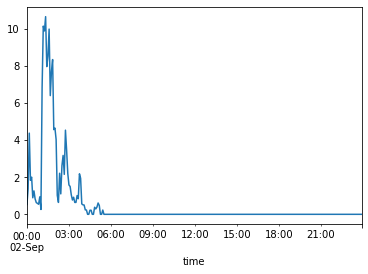

In [16]:
prcp = MANH['precip_incremental [mm]']
prcp.plot()

#### That was a way to get a quick look at the data and verify it looks reasonable. Now, let's pretty it up by using Matplotlib functions.

#### We'll draw a line plot, passing in time and wind gust speed for the x- and y-axes, respectively. Follow the same procedure as we did in the Matplotlib notebooks from week 3.

ValueError: x and y must have same first dimension, but have shapes (36288,) and (288,)

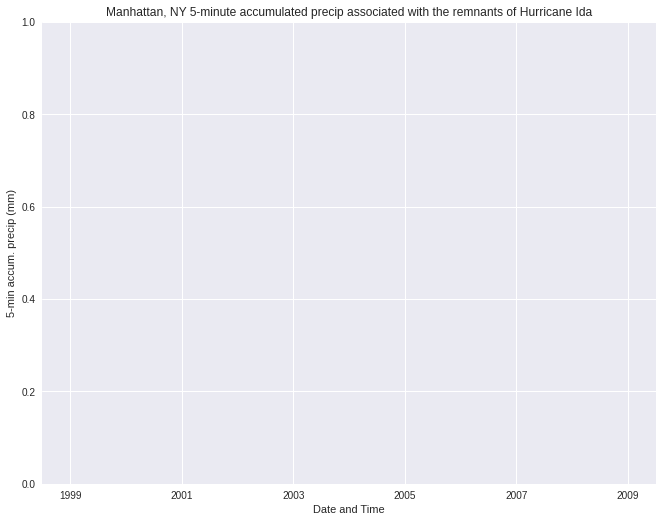

In [17]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel ('Date and Time')
ax.set_ylabel ('5-min accum. precip (mm)')
ax.set_title ("Manhattan, NY 5-minute accumulated precip associated with the remnants of Hurricane Ida")
ax.plot (timeIndx, prcp)

### <span style="color: red">Didn't work!!! Look at the error message above!</span>
#### This is a *mismatch* between array sizes. The time index is based on the entire Dataframe, which has 12 x 24 x 126 rows, while the Manhattan precip array is only 12 x 24!

### Let's set a condition where we match only those times that are in the same row as the Manhattan station id.

In [18]:
condition = nysm_data['station'] == 'MANH'
timeIndxMANH = timeIndx[condition]
timeIndxMANH

DatetimeIndex(['2021-09-01 20:00:00-04:00', '2021-09-01 20:05:00-04:00',
               '2021-09-01 20:10:00-04:00', '2021-09-01 20:15:00-04:00',
               '2021-09-01 20:20:00-04:00', '2021-09-01 20:25:00-04:00',
               '2021-09-01 20:30:00-04:00', '2021-09-01 20:35:00-04:00',
               '2021-09-01 20:40:00-04:00', '2021-09-01 20:45:00-04:00',
               ...
               '2021-09-02 19:10:00-04:00', '2021-09-02 19:15:00-04:00',
               '2021-09-02 19:20:00-04:00', '2021-09-02 19:25:00-04:00',
               '2021-09-02 19:30:00-04:00', '2021-09-02 19:35:00-04:00',
               '2021-09-02 19:40:00-04:00', '2021-09-02 19:45:00-04:00',
               '2021-09-02 19:50:00-04:00', '2021-09-02 19:55:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='time', length=288, freq=None)

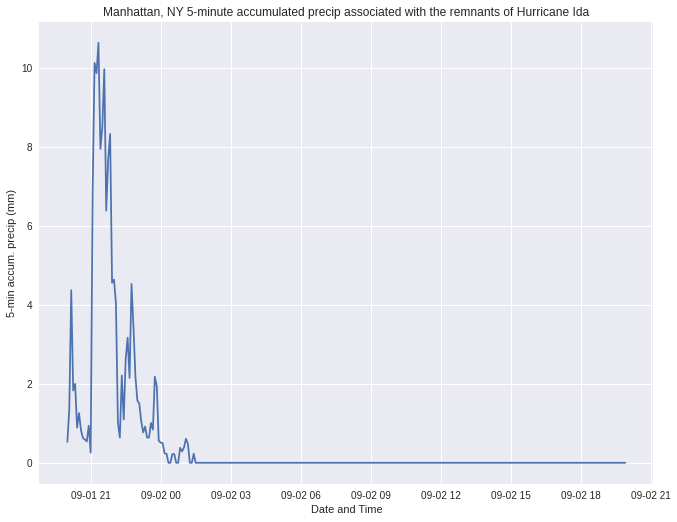

In [19]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel ('Date and Time')
ax.set_ylabel ('5-min accum. precip (mm)')
ax.set_title ("Manhattan, NY 5-minute accumulated precip associated with the remnants of Hurricane Ida")
ax.plot (timeIndxMANH, prcp);

### That's looking better! We still have work to do to improve the labeling of the x-axis tick marks, but we'll save that for another time.

<div class="alert alert-warning">
    <b>Explore further:</b> Try making plots of other NYSM variables, from different NYSM sites.</div>

---
## Summary

* Use a `lambda` function to convert Date/time strings into Python `datetime` objects
* Pandas' `plot` method allows for a quick visualization of `DataFrame` and `Series` objects. 
* x- and y- arrays must be of the same size in order to be plotted.

### What's Next?
Coming up next week, we will conclude our exploration of Pandas.

## Resources and References
1. [`datetime`objects in NumPy arrays](https://numpy.org/doc/stable/reference/arrays.datetime.html)
1. [Date/time string formatting guide](https://strftime.org/)
1. [Use of a `lambda` function in `read_csv` (Corey Schafer YouTube channel)](https://www.youtube.com/watch?v=UFuo7EHI8zc&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&index=10&ab_channel=CoreySchafer)

